# Spark in Python


In [ ]:
#pip install pyspark

  Using cached pyspark-3.5.4-py2.py3-none-any.whl
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
Note: you may need to restart the kernel to use updated packages.


## Spark context

connecting to spark cluster

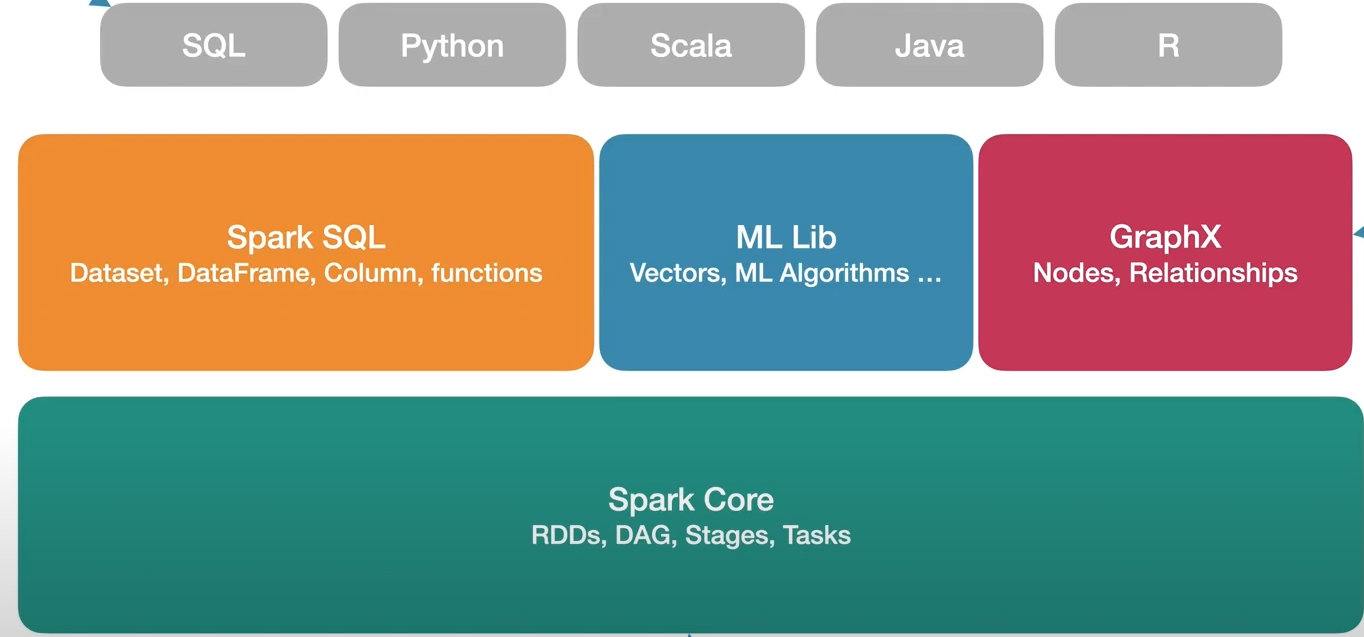

In [2]:
from pyspark.context import SparkContext

sc = SparkContext('local','test context')

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/01 21:25:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
print(sc)
print(sc.uiWebUrl)

<SparkContext master=local appName=test context>
http://pop-os:4040


## Using DataFrames
Spark's core data structure is the Resilient Distributed Dataset (RDD). This is a low level object that lets Spark work its magic by splitting data across multiple nodes in the cluster.
it's up to the data scientist to figure out the right way to optimize the query, but the DataFrame implementation has much of this optimization built in!
To start working with Spark DataFrames, you first have to create a SparkSession object from your SparkContext. You can think of the SparkContext as your connection to the cluster and the SparkSession as your interface with that connection.

In [8]:
from pyspark.sql import SparkSession


myspark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/04 00:03:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [8]:
print(myspark)

 Creating multiple SparkSessions and SparkContexts can cause issues, so it's best practice to use the SparkSession.builder.getOrCreate() method. This returns an existing SparkSession if there's already one in the environment, or creates a new one if necessary!

In [11]:
print(myspark.catalog.listTables())

[]


## Spark sql
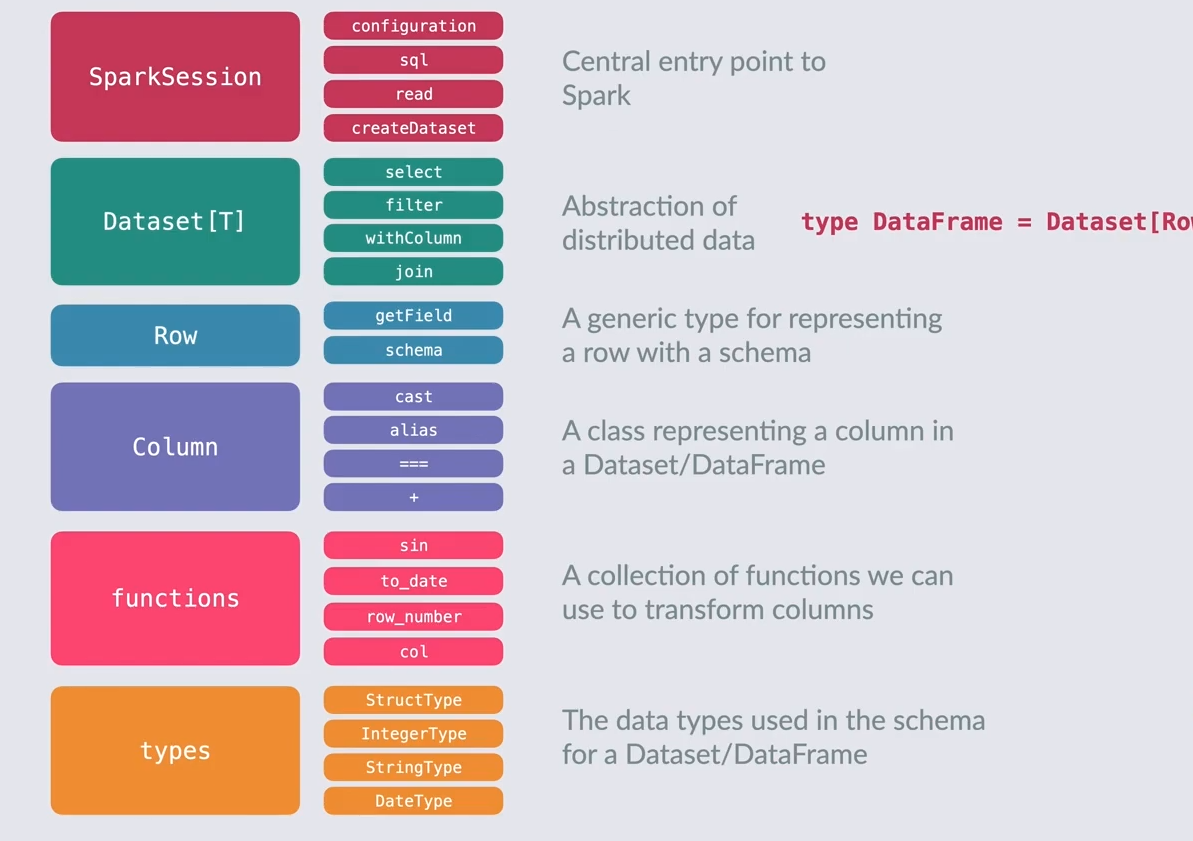

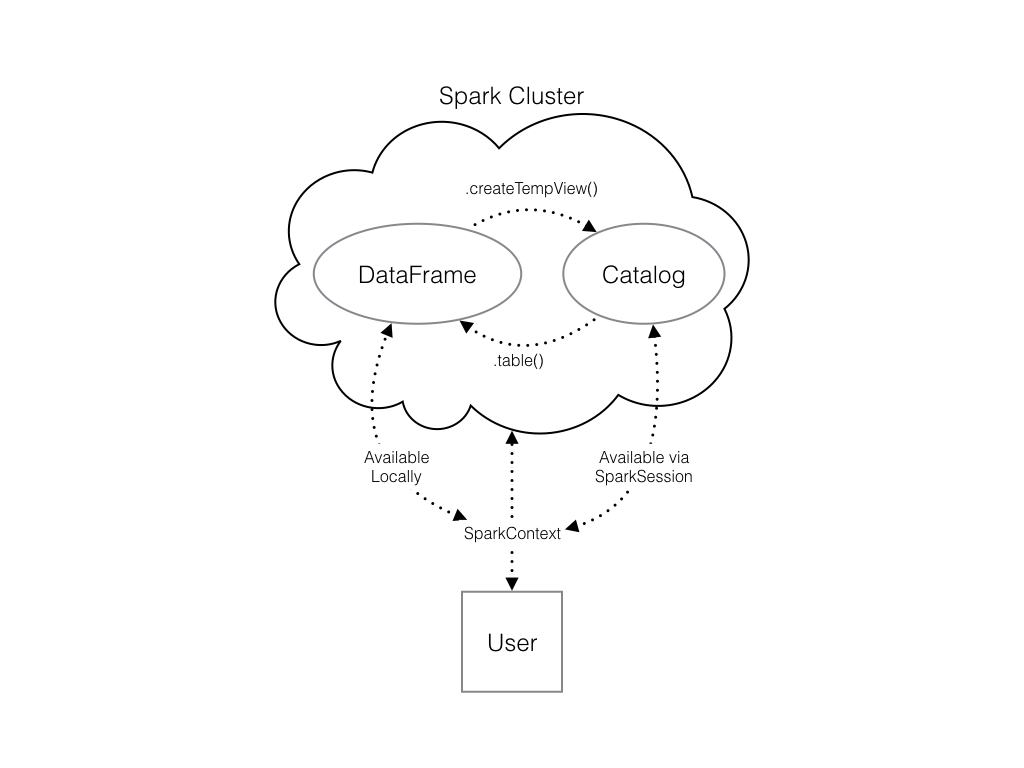

In [ ]:
# The .createDataFrame() method takes a pandas DataFrame and returns a Spark DataFrame.
import pandas as pd
# SQLContext / SparkSession

job_df= pd.read_csv('data/job-data.csv', encoding='latin1')


job_df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [9]:
# Don't change this file path
file_path = "data/job-data.csv"

# Read in the airports data
airports = myspark.read.csv(file_path, header=True)

# Show the data
airports.show()

+-------------------+--------------------+--------------------+----------+----------------+--------+--------------------------+--------------------+
|            Company|           Job Title|            Location|  Job Type|Experience level|  Salary|Requirment of the company |          Facilities|
+-------------------+--------------------+--------------------+----------+----------------+--------+--------------------------+--------------------+
|                SGS|Clinical Data Ana...|Richardson, TX, U...| Full Time|     Entry-level|  48K+ *|      Computer Science,...|                ,,,,|
|            Ocorian|AML/CFT & Data An...|    Eb�ne, Mauritius| Full Time|     Entry-level|  48K+ *|      Agile,Data manage...|                ,,,,|
|             Cricut|Machine Learning ...|South Jordan, UT,...| Full Time|            null|  90K+ *|      Agile,Architectur...|Career developmen...|
|        Bosch Group|Application Devel...|    Nonantola, Italy| Full Time|     Entry-level|  48K+ *|      

What is the difference between the two :

- * spark.table(): Loads an existing table from the Spark catalog.

- * spark.createDataFrame(): Creates a DataFrame from in-memory data.